# top generator systematics


In [2]:
# imports and configuration
%cd /home/naodell/work/wbr/analysis

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('default')
from tqdm import tqdm_notebook

import scripts.plot_tools as pt
import scripts.systematic_tools as st

np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {'legend.fontsize': 14,
          'axes.labelsize': 14,
          'figure.figsize': (8, 8),
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'xtick.labelsize':12,
          'ytick.labelsize':12,
         }
matplotlib.rcParams.update(params)

%connect_info

/home/naodell/work/wbr/analysis
Welcome to JupyROOT 6.14/04
{
  "shell_port": 43231,
  "iopub_port": 60357,
  "stdin_port": 47751,
  "control_port": 34887,
  "hb_port": 45535,
  "ip": "127.0.0.1",
  "key": "8eda0324-7d702c061f0de11e7540c20b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-bf30823c-ec27-42c9-9e46-76864daee4f5.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
# Get the data 
selection = 'etau'
targets    = dict(
                  mumu  = 'lepton2_pt', 
                  ee    = 'lepton2_pt', 
                  emu   = 'trailing_lepton_pt', #'dilepton1_pt_asym', 
                  mutau = 'lepton2_pt', 
                  etau  = 'lepton2_pt', 
                  mu4j  = 'lepton1_pt',
                  e4j   = 'lepton1_pt'
                 )

input_dir = f'local_data/flatuples/updated_e_sf/{selection}_2016'
dataset_names = ['ttbar_inclusive']#, 'ttbar_lep', 'ttbar_semilep']
dm_nominal = pt.DataManager(input_dir, dataset_names, selection)

input_dir = f'local_data/flatuples/ttbar_systematics_new/{selection}_2016'
dataset_names = [
                 'ttbar_inclusive_isrup', 'ttbar_inclusive_isrdown',    
                 'ttbar_inclusive_fsrup', 'ttbar_inclusive_fsrdown',    
                 'ttbar_inclusive_hdampup', 'ttbar_inclusive_hdampdown',
                 'ttbar_inclusive_tuneup', 'ttbar_inclusive_tunedown',
    
                 'ttbar_inclusive_isrup_ext1', 'ttbar_inclusive_isrdown_ext1',    
                 'ttbar_inclusive_fsrup_ext1', 'ttbar_inclusive_fsrdown_ext1',    
                 'ttbar_inclusive_fsrup_ext2', 'ttbar_inclusive_fsrdown_ext2',    
                 'ttbar_inclusive_hdampup_ext1', 'ttbar_inclusive_hdampdown_ext1',
                 'ttbar_inclusive_tuneup_ext1', 'ttbar_inclusive_tunedown_ext1',
                ]
dm_syst = pt.DataManager(input_dir, dataset_names, selection)

Loading dataframes: 100%|███████████████| 1.00/1.00 [00:02<00:00, 2.40s/it]
Loading dataframes: 100%|███████████████| 18.0/18.0 [00:02<00:00, 6.82it/s]


/home/naodell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


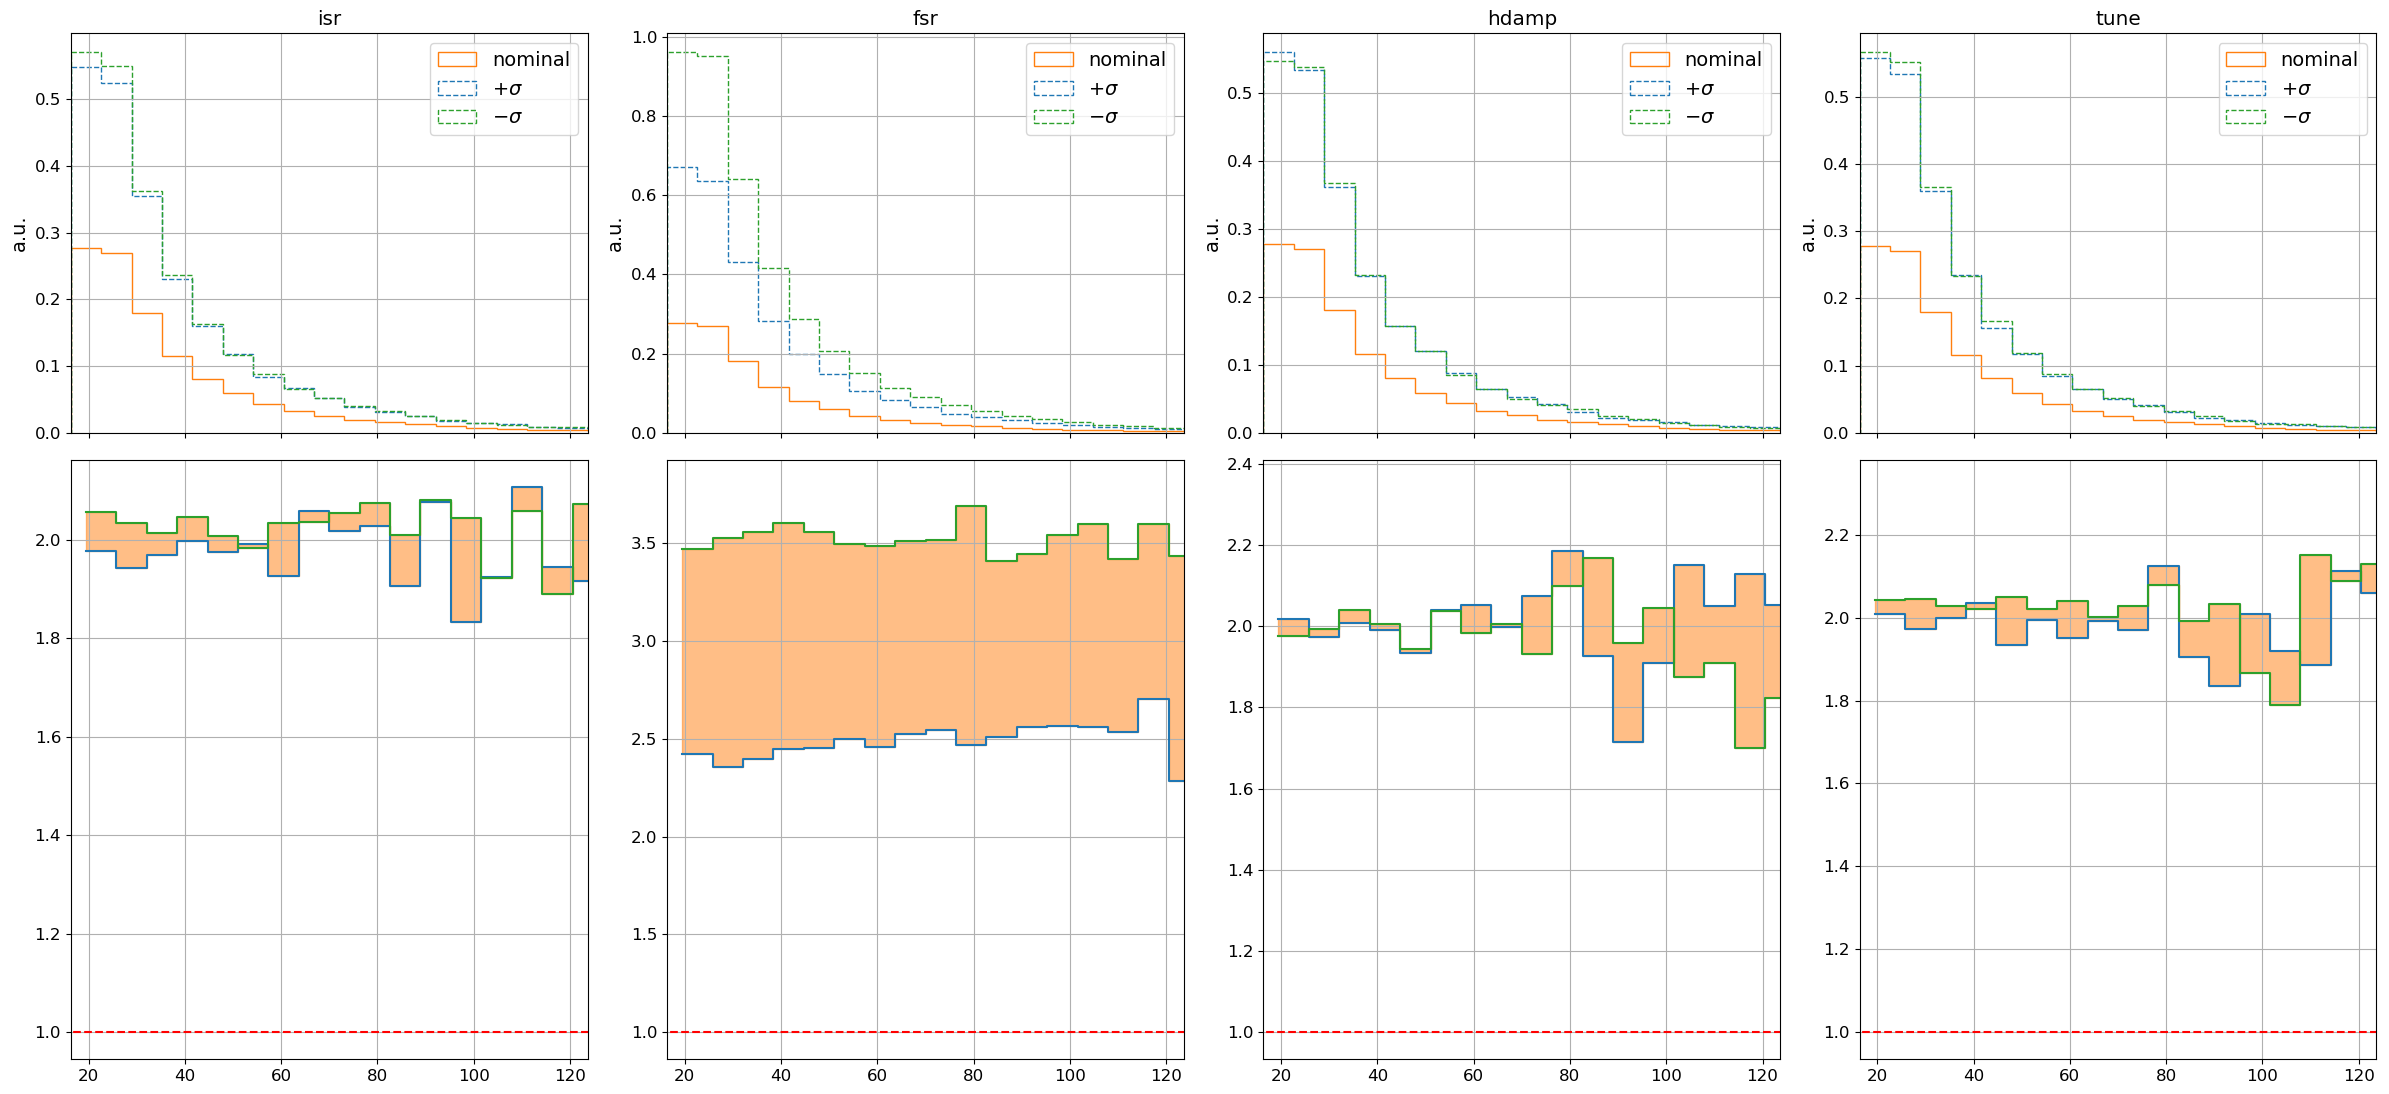

In [7]:
# Variations from dedicated samples

fig, axes = plt.subplots(2, 4, figsize=(24, 12), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[2,3]})
fig.subplots_adjust(hspace=0)

bins = np.linspace(10, 130, 20)
feature = targets[selection]
for ix, label in enumerate(['isr', 'fsr', 'hdamp', 'tune']):
    # isr
    df_nominal = dm_nominal.get_dataframe('ttbar')
    df_up = dm_syst.get_dataframe(f'ttbar_{label}up')
    df_down = dm_syst.get_dataframe(f'ttbar_{label}down')

    ax = axes[0][ix]
    h_nominal, b, _ = ax.hist(df_nominal[feature], color='C1', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight, label='nominal')
    h_plus, _, _   = ax.hist(df_up[feature], color='C0', bins=bins, linestyle='--', histtype='step', weights=df_up.weight, label=r'$+\sigma$')
    h_minus, _, _ = ax.hist(df_down[feature], color='C2', bins=bins, linestyle='--', histtype='step', weights=df_down.weight, label=r'$-\sigma$')
    ax.set_title(f'{label}')
    ax.set_ylabel('a.u.')
    ax.set_xlim([bins[1], bins[-2]])
    ax.legend() 
    ax.grid()

    ax = axes[1][ix]
    dx = (b[1:] - b[:-1])/2
    x = b[:-1] + dx
    y_up = h_plus/h_nominal
    y_down = h_minus/h_nominal
    ax.plot(x, y_up, 'C0', drawstyle='steps-post')
    ax.plot(x, y_down, 'C2', drawstyle='steps-post')
    ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
    ax.plot((bins[0], bins[-1]), [1, 1], 'r--')
    ax.grid()


#fig.suptitle(f'{selection} channel', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'plots/systematics/{selection}_generator_scale.pdf')
plt.show()

In [ ]:
# variations based on event weights (QCD scale, PDF, alpha_s)

fig, axes = plt.subplots(2, 1, figsize=(8, 8), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

ax = axes[0]
h_nominal, b, _ = ax.hist(df_nominal[feature], color='k', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight)
h_nom_up, _, _   = ax.hist(df_nominal[feature], color='C0', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight*df_nominal.qcd_weight_nom_up)
h_nom_down, _, _ = ax.hist(df_nominal[feature], color='C0', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight*df_nominal.qcd_weight_nom_down, label='_nolegend_')
h_up_nom, _, _   = ax.hist(df_nominal[feature], color='C1', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight*df_nominal.qcd_weight_up_nom)
h_down_nom, _, _ = ax.hist(df_nominal[feature], color='C1', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight*df_nominal.qcd_weight_down_nom, label='_nolegend_')
h_up_up, _, _   = ax.hist(df_nominal[feature], color='C2', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight*df_nominal.qcd_weight_up_up)
h_down_down, _, _ = ax.hist(df_nominal[feature], color='C2', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight*df_nominal.qcd_weight_down_down, label='_nolegend_')
ax.set_title(r'QCD scale ($\sf t\bar{t}$)')
ax.set_ylabel(r'$\sf N_{entries}$')
ax.set_xlim([bins[0], bins[-1]])
ax.legend(['nominal', r'$\mu_{F} \pm$', r'$\mu_{R} \pm$', r'$\mu_{R}\pm,\mu_{F}\pm$'])
ax.grid()

ax = axes[1]
dx = (b[1:] - b[:-1])/2
x = b[:-1] + dx
y_nom_up = h_nom_up/h_nominal
y_nom_down = h_nom_down/h_nominal
y_up_nom = h_up_nom/h_nominal
y_down_nom = h_down_nom/h_nominal
y_up_up = h_up_up/h_nominal
y_down_down = h_down_down/h_nominal
ax.plot(x, y_nom_up, '-C0')
ax.plot(x, y_nom_down, '-C0')
ax.plot(x, y_up_nom, '-C1')
ax.plot(x, y_down_nom, '-C1')
ax.plot(x, y_up_up, '-C2')
ax.plot(x, y_down_down, '-C2')
#ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5)
ax.plot((bins[0], bins[-1]), [1, 1], 'k-')
ax.set_ylabel(r'$\sf \frac{N_{\pm}}{N_{0}}$')
ax.set_xlabel(feature)
ax.grid()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'plots/systematics/{selection}_QCD_scale.pdf')
plt.show()

In [ ]:
# variations based on event weights (QCD scale, PDF)

fig, axes = plt.subplots(2, 1, figsize=(8, 8), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

ax = axes[0]
h_nominal, b, _ = ax.hist(df_nominal[feature], color='k', bins=bins, linestyle='-', histtype='step', weights=df_nominal.weight)
h_up, _, _   = ax.hist(df_nominal[feature], color='C0', bins=bins, linestyle='--', histtype='step', weights=df_nominal.weight*(1 + np.sqrt(df_nominal.pdf_var)/np.sqrt(99)))
h_down, _, _ = ax.hist(df_nominal[feature], color='C1', bins=bins, linestyle='--', histtype='step', weights=df_nominal.weight*(1 - np.sqrt(df_nominal.pdf_var)/np.sqrt(99)))
ax.set_title(r'PDF variation ($\sf t\bar{t}$)')
ax.set_ylabel(r'$\sf N_{entries}$')
ax.set_xlim([bins[0], bins[-1]])
ax.legend(['nominal', r'$+\sigma_{PDF}$', r'$-\sigma_{PDF}$'])
ax.grid()

ax = axes[1]
dx = (b[1:] - b[:-1])/2
x = b[:-1] + dx
y_up = h_up/h_nominal
y_down = h_down/h_nominal
ax.plot(x, y_up, '--C0')
ax.plot(x, y_down, '--C1')
#ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5)
ax.plot((bins[0], bins[-1]), [1, 1], 'k-')
ax.set_ylabel(r'$\sf \frac{N_{\pm}}{N_{0}}$')
ax.set_xlabel(feature)
ax.grid()

plt.tight_layout()
plt.savefig(f'plots/systematics/{selection}_PDF.pdf')
plt.show()